In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from google.colab import drive

This lottery dataset consists of one .csv file which covers historical lottery data in Washington
state from June 2014 - November 2022. The original source was Lottery Corner -
https://www.lotterycorner.com/wa/powerball/2022. The data was downloaded into separate .csv
files then wrangled and cleaned by this author.

Data Dictionary

    date - date of winnings

    weekday - day of the week numbers
    were announced

    winning_numbers - String of winning jackpot
    numbers

    powerball - Winning powerball number -
    If your Powerball matches the
    one that is drawn you will get
    your $2 ticket purchase back
    and a couple bucks more, for
    a total of $4.

    powerplay - Winning powerplay number -
    for an additional $1 per play,
    the powerplay feature
    multiplies non-jackpot prizes.
    The multiplier number is
    randomly selected just before
    each drawing.

    jackpot - Total winning jackpot amount
    in USD.

Exploratory Question Examples

● What were the most common powerball numbers depending on the day?
● What were the most common powerball numbers overall?
● What were the most common powerplay numbers by day?
● What were the most common powerplay numbers overall?
● Which day of the week had the highest median jackpot?


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pet projects/lottery_data.xls')
df.head(5)

,date,weekday,winning_numbers,powerball,powerplay,jackpot
0,2014-05-07,Wed,17-29-31-48-49,34,2,70000000
1,2014-05-10,Sat,4-31-41-47-55,1,2,90000000
2,2014-05-14,Wed,7-33-39-52-55,33,3,90000000
3,2014-05-17,Sat,23-32-39-47-49,22,3,114000000
4,2014-05-21,Wed,4-20-34-39-58,31,5,114000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             950 non-null    object
 1   weekday          950 non-null    object
 2   winning_numbers  950 non-null    object
 3   powerball        950 non-null    int64 
 4   powerplay        950 non-null    int64 
 5   jackpot          950 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [ ]:
df[["powerball","powerplay"]].describe(include="all")

,powerball,powerplay
count,950.000000,950.000000
mean,14.510526,2.694737
std,8.165142,1.142840
min,1.000000,0.000000
25%,8.000000,2.000000
50%,14.500000,2.000000
75%,21.000000,3.000000
max,35.000000,10.000000


In [ ]:
df.isnull().sum()

date               0
weekday            0
winning_numbers    0
powerball          0
powerplay          0
jackpot            0
dtype: int64

Wed    444
Sat    443
Mon     63
Name: weekday, dtype: int64

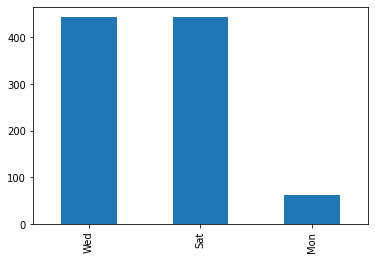

In [ ]:
df.weekday.value_counts().plot(kind='bar')
df.weekday.value_counts()

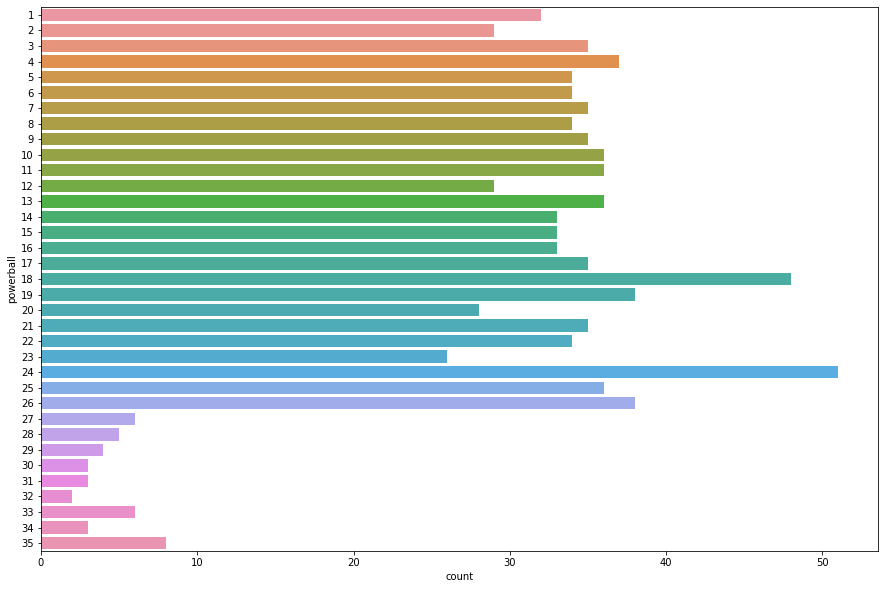

In [ ]:
dims = (15, 10)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(ax=ax, data=df, y="powerball")

In [ ]:
pd.crosstab(df.weekday,df.powerplay)

powerplay,0,2,3,4,5,10
weekday,,,,,,
Mon,0,39,20,3,1,0
Sat,0,249,141,31,19,3
Wed,1,235,144,27,29,8


In [ ]:
df[df.jackpot>np.median(df.jackpot)]['weekday'].value_counts()

Sat    220
Wed    215
Mon     40
Name: weekday, dtype: int64